## Binning Data with Pandas cut and qcut

This notebook accompanies the article posted on [pbpython.com](http://pbpython.com/pandas-qcut-cut.html)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')

In [4]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

In [12]:
df


,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,184793.70


A histogram is an example of binning data and showing the visual representation of the data distribution

## Introducing qcut

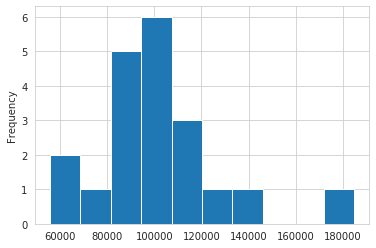

In [10]:
df['ext price'].plot(kind='hist')

Describe shows how data can be cut by percentiles

In [7]:
df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

Here is an example of using [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [11]:
pd.qcut(df['ext price'], q=4)

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

Assign the results of the values back to the original dataframe

In [45]:
df['avg'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_3'] = df.groupby(['avg'], as_index=False)['ext price'].mean()
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

In [46]:
df

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex1_avg,quantile_ex_3,avg
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",<bound method Series.mean of 0 (55733.0490...,"(55733.049000000006, 89137.708]","(55733.049000000006, 89137.708]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",<bound method Series.mean of 0 (55733.0490...,"(89137.708, 100271.535]","(89137.708, 100271.535]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",<bound method Series.mean of 0 (55733.0490...,"(100271.535, 110132.552]","(55733.049000000006, 89137.708]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",<bound method Series.mean of 0 (55733.0490...,"(110132.552, 184793.7]","(110132.552, 184793.7]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(89137.708, 100271.535]"
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(89137.708, 100271.535]"
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(55733.049000000006, 89137.708]"
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(100271.535, 110132.552]"
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 184793.7]","(112290.0, 124778.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(110132.552, 184793.7]"
9,424914,White-Trantow,184793.70,"(110132.552, 184793.7]","(124778.0, 184794.0]",<bound method Series.mean of 0 (55733.0490...,NaN,"(110132.552, 184793.7]"


In [62]:
# importing pandas as pd 
import pandas as pd 

# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
				"B":[7, 2, 54, 3, None], 
				"C":[20, 16, 11, 3, 8],
				"D":[14, 3, None, 2, 6]}) 

# skip the Na values while finding the mean 
df['A'].mean(skipna=True)
pd.mean(df['A'])


AttributeError: module 'pandas' has no attribute 'mean'

In [48]:
df['avg']

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: avg, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

Look at the distribution

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Resource usage statistics')

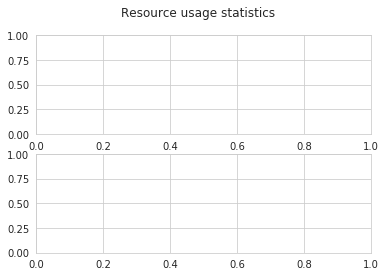

In [66]:
fig, stat_subplot = plt.subplots(2, 1)
fig.suptitle("Resource usage statistics")
stat_subplot[0]
fig.

In [11]:
df['quantile_ex_1'].value_counts()

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [12]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

In [13]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [14]:
df['quantile_ex_3'].value_counts()

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

In [15]:
results, bin_edges = pd.qcut(df['ext price'],
                             q=[0, .2, .4, .6, .8, 1],
                             labels=bin_labels_5,
                             retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                             columns=['Threshold', 'Tier'])

In [16]:
results_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [17]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
freq,5,2,4


We can pass the percentiles to use to describe

In [18]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,101711.287500
std,231499.208970,27037.449673
min,141962.000000,55733.050000
0%,141962.000000,55733.050000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,184793.700000
max,786968.000000,184793.700000


labels=False will return integers for each bin

In [19]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1


## cut

Remove the added columns to make the examples shorter

In [20]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])

In [21]:
pd.cut(df['ext price'], bins=4)

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55603.989, 87998.212] < (87998.212, 120263.375] < (120263.375, 152528.538] < (152528.538, 184793.7]]

In [22]:
pd.cut(df['ext price'], bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

In [23]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [24]:
df.head()

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,63626.03,silver
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold


We can use nump.linspace to define the ranges

In [25]:
np.linspace(0, 200000, 9)

array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
       175000., 200000.])

In [26]:
pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

0       (50000.0, 75000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (175000.0, 200000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64]): [(0.0, 25000.0] < (25000.0, 50000.0] < (50000.0, 75000.0] < (75000.0, 100000.0] < (100000.0, 125000.0] < (125000.0, 150000.0] < (150000.0, 175000.0] < (175000.0, 200000.0]]

numpy arange is another option

In [27]:
np.arange(0, 200000, 10000)

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000])

In [28]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left')

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)],
              closed='left',
              dtype='interval[int64]')

In [29]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df['cut_ex2'] = pd.cut(df['ext price'], bins=interval_range, labels=[1,2,3])
df.head()

,account number,name,ext price,cut_ex1,cut_ex2
0,141962,Herman LLC,63626.03,silver,"(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,gold,"(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,gold,"(70000, 80000]"
3,218895,Kulas Inc,137351.96,diamond,"(130000, 140000]"
4,239344,Stokes LLC,91535.92,gold,"(90000, 100000]"
